# Data Analytics Part 1: Descriptive Analytics and Clustering

## Overview

In this chapter, we will learn how to conduct various types of exploratory and descriptive analytics. Besides getting a general understanding of the data and the relationships between the included variables, the central question here is **"What happened?"**

In the iterative Data Analytics lifecycle, this is typically part of the "Data Understanding" and "Data Preparation" stages.

<img src="Lifecycle_DataPrep.png" width=90%>

## Scenario: Library 


<img src="https://www.wu.ac.at/fileadmin/wu/_processed_/9/e/csm_LC_aussen_079afb21f1.jpg">
For this first part and the remaining Python tutorials, we will use datasets from our university library. 

Specifically, we want to investigate library visitors and lending behavior, i.e., when visitors go through the main library entrances, what (type of) books they borrow, and other related questions.

From a business understanding perspective, we want to **better understand our clients (students, university employees, visitors) and their needs (when they visit, what type of books they request, etc.)**. 

In a further step, we might also want to investigate **why certain book types are returned too late, and if there are factors that increase the probability of a late book return**. This will be covered in the next chapters.

### Types of Analytics

<img src="TypesOfAnalytics.png">

Different Types of Analytics Goals, from Delen, D., & Ram, S. (2018). Research challenges and opportunities in business analytics. Journal of Business Analytics, 1(1), 2-12. 

### Side note: Translating Business Understanding into a Data Analytics Problem

Now that we know that the library is interested in better understanding its customers, we can start to convert this business goal into a project that can be tackled through data analytics. 

Here, let's assume that the lirbrary has two main objectives: 

1. Understand its customer base, when and how often they visit the library, and how busy the library is in general. 

1. Better understand why certain books are returned after the return deadline, and assess if there are factors that increase (or decrease) the likelihood of books being returned too late.


The first part of the first goal, understanding the general customer base and its behavior, will be tackled by **Exploratory Data Analysis**. For example, we analyze when customers show up, if different customer types have different visiting behavior, and so on. 

<div class="alert alert-block alert-info">
<strong>Exploratory Data Analysis:</strong>
As part of Data Understanding, the term "Exploratory Data Analysis" (EDA) captures a wide set of initial activities to understand the data, variables, their relationships, find patterns and/or anomalies, check assumptions, and related tasks. EDA employs methods from descriptive statistics, particularly numerical and graphical summaries of data, for this goal.
</div>

For the second goal, we have several potential target variables: either a binary **Late Return** with two potential values: Yes, or No; or a continuous target variable **Days Late**, which measures the number of days a book is returned late. Hence, we either have a binary variable that we want to predict, or a continuous target variable. From a Data Analytics perspective, the first problem falls under the category of **classification**, whereas the second problems falls under the general domain of **regression** problems. Given a set of characteristics (variables), we want to predict the target (variable, here either Late Return or Days Late).


# Data Understanding, Data Preparation, and Exploratory Data Analytics

In the first step, **Business Understanding**, we have identified the two goals of our Data Analytics project: Understanding the customer base that visits the library, and predicting if a book is going to be returned late or not.

As a next step, **Data Understanding** now aims to investigate what data we have available, what the available variables actually mean/represent, and if the available data are sufficient to address the goals of the project (note: you might not be able to fully answer the suitability question during the first iteration of the lifecycle. Sometimes, after evaluating how well we are able to predict customer churn, we might see that the available variables are not sufficient to create a good model, which can then lead to additional data being included in the project scope).

Let's start by loading the dataset and investigating its basic characteristics.

## Load data

We have several interesting datasets available from the WU library as well as Open Data on rooms, organizations, and room bookings. Let's load them into Python objects first

In [1]:
import pandas as pd
from pathlib import Path

# The visitor data is separated into multiple csv files. 
# To load all of it, we create a list of files ending with .csv and concatenate all of them into a single file:
path_to_data = "../Data"

filelist = Path(path_to_data + "/Drehkreuzdaten/LC Rohdaten 2019_2022/").glob("**/*.csv")

df_list = []
for file in filelist:
    str_file = str(file)

    # read in the csv files into data frames and append them to the list
    df_list.append(pd.read_csv(str_file, sep=";", encoding="utf-16"))

# Finally, concatenate the individual data frames into a single data frame
drehkreuz = pd.concat(df_list, ignore_index=True)

# for the library, we can also load the book reservations
lib_loan = pd.read_csv(path_to_data + "/LoanDataSample.csv", sep=",",encoding='latin')

/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/conda/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Inspect data

Here, we can investigate the basic properties of the data. Let's start by looking at what variables are included in the Drehkreuz dataset.

In [2]:
drehkreuz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751337 entries, 0 to 751336
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Kategorie Zielbereich  751337 non-null  object
 1   Datum                  751337 non-null  object
 2   Zeit                   751337 non-null  object
 3   Anzahl                 751337 non-null  object
 4   Pnr                    751337 non-null  object
dtypes: object(5)
memory usage: 28.7+ MB


In [3]:
drehkreuz.head()

,Kategorie Zielbereich,Datum,Zeit,Anzahl,Pnr
0,Mitarbeiter LC_Bib_Gates,2020-12-17,13:02:23,1,10**********
1,Mitarbeiter LC_Bib_Gates,2020-12-17,12:54:14,1,10**********
2,Mitarbeiter LC_Bib_Gates,2020-12-18,08:06:25,1,10**********
3,Mitarbeiter LC_Bib_Gates,2020-12-14,16:01:38,1,10**********
4,Mitarbeiter LC_Bib_Gates,2020-12-18,14:03:36,1,10**********


For an initial summary, we can use the describe() function (or similar functions in Python) to get a first overview. 

In [4]:
drehkreuz.describe()

,Kategorie Zielbereich,Datum,Zeit,Anzahl,Pnr
count,751337,751337,751337,751337,751337
unique,3,683,518249,1,3
top,Studenten LC_Bib_Gates,2019-11-19,14:05:22,1,20**********
freq,537342,3032,27,751337,537342


For example, we see that there are three different types of users, and we have 683 unique Dates in the data. 

However, to make the best use of the data, we need to take some additional data preparation steps before we can further analyze the dataset. 

In [5]:
t = pd.DataFrame([[i,drehkreuz[i].unique()] for i in drehkreuz.columns])
t.columns = ['name','unique']
t   

,name,unique
0,Kategorie Zielbereich,"[Mitarbeiter LC_Bib_Gates, Studenten LC_Bib_Ga..."
1,Datum,"[2020-12-17, 2020-12-18, 2020-12-14, 2020-12-1..."
2,Zeit,"[13:02:23, 12:54:14, 08:06:25, 16:01:38, 14:03..."
3,Anzahl,[1]
4,Pnr,"[10**********, 20**********, 50**********]"


## Data Preparation

### Introduction

Data preparation activities can take up most of the time spent on a Data Analytics project because real-world data is often messy and will often include:

 - Missing / incomplete values
 - Incorrect / inconsistent values
 - Unclear meaning of variables and data.

**NOTES:**
- Data preparation is a vital step
- Preprocessing imposes an upper limited on the possible quality of downstream analyses (or: if you mess up here, saving it later will often not be possible..)
- ML algorithms will always give you a model
- But: Quality of that model highly dependent on input (Garbage in → garbage out)
- Data preparation = eliminate "bad influence" of variables
- Repeatability and verifiability are key!

Hence, a key part of a Data Analytics project is to address these issues and prepare the data for subsequent analysis. 

**Common preprocessing activities** include:

- Dealing with **missing values**: Imputation methods to replace missing values with estimates

- **Outlier Detection**: detecting potential outliers and deciding how to handle them. 

- **Scaling variables**: transforming variable values to consistent scales

- **Feature Engineering**: derive new variables from raw data 

- **Feature Selection**, i.e., selecting which variables to use in the modeling step (in practice often done in conjunction with training and evaluating models)


**Note:** Data preparation is a key step that can deeply impact the quality of your results (e.g., correctness of an analysis, fit of a model etc.) - remember: GiGo (garbage in, garbage out).

### Library entrance data set preparation

#### Missing values

We don't have missing values in our datasets, so we'll skip this. However, there are many approaches/packages available in Python that help you **impute** the missing values.

#### Feature Transformation

<div class="alert alert-block alert-info">
<strong>Feature Transformation</strong>
While investigating the original data is a useful first step, this initial data (or variables in the data) need to be transformed before we can proceed with further analysis. 

A typical example is to specify that a certain column in fact represents a data or time. For numerical variables, another typical feature transformation is scaling (e.g., such that the transformed variable has a mean of 0 and standard deviation of 1). 
</div>

##### Split up multiple check-ins

Here, we see that sometimes we have multiple check-ins for the same person on the same day:

In [6]:
drehkreuz["Zeit"]

0                   13:02:23
1                   12:54:14
2                   08:06:25
3                   16:01:38
4                   14:03:36
                 ...        
751332              14:48:11
751333              14:48:07
751334              14:48:32
751335    14:15:16, 14:18:04
751336    14:15:11, 14:17:49
Name: Zeit, Length: 751337, dtype: object

Let's convert these individual entrances into multiple observations. We also want to keep the original index to preserve the information if multiple check-ins belong to the same person.

In [7]:
drehkreuz["ID"] = drehkreuz.index.to_series()
drehkreuz["Check-in Time"] = drehkreuz["Zeit"].str.split(",")
drehkreuz = drehkreuz.explode("Check-in Time").reset_index(drop=True)
drehkreuz["Check-in Time"] = drehkreuz["Check-in Time"].str.replace(" ", "") # strip white spaces

In [8]:
drehkreuz

,Kategorie Zielbereich,Datum,Zeit,Anzahl,Pnr,ID,Check-in Time
0,Mitarbeiter LC_Bib_Gates,2020-12-17,13:02:23,1,10**********,0,13:02:23
1,Mitarbeiter LC_Bib_Gates,2020-12-17,12:54:14,1,10**********,1,12:54:14
2,Mitarbeiter LC_Bib_Gates,2020-12-18,08:06:25,1,10**********,2,08:06:25
3,Mitarbeiter LC_Bib_Gates,2020-12-14,16:01:38,1,10**********,3,16:01:38
4,Mitarbeiter LC_Bib_Gates,2020-12-18,14:03:36,1,10**********,4,14:03:36
...,...,...,...,...,...,...,...
1636042,BibUser LC_Bib_Gates,2021-07-08,14:48:32,1,50**********,751334,14:48:32
1636043,BibUser LC_Bib_Gates,2021-07-09,"14:15:16, 14:18:04",1,50**********,751335,14:15:16
1636044,BibUser LC_Bib_Gates,2021-07-09,"14:15:16, 14:18:04",1,50**********,751335,14:18:04
1636045,BibUser LC_Bib_Gates,2021-07-09,"14:15:11, 14:17:49",1,50**********,751336,14:15:11


##### Data Type conversions

Let's look at summary information about our `drehkreuz` data frame:

In [9]:
drehkreuz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636047 entries, 0 to 1636046
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   Kategorie Zielbereich  1636047 non-null  object
 1   Datum                  1636047 non-null  object
 2   Zeit                   1636047 non-null  object
 3   Anzahl                 1636047 non-null  object
 4   Pnr                    1636047 non-null  object
 5   ID                     1636047 non-null  int64 
 6   Check-in Time          1636047 non-null  object
dtypes: int64(1), object(6)
memory usage: 87.4+ MB


What we see is that 
 - `Anzahl` is not an integer
 - `Datum`, `Zeit` and also our derived `Check-in Time` are not of `Date` type
 
*Note:* For information on Pandas data types (which are mostly based on NumPy's data types), cf. the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes). The `object` can story any Python object and is automatically used when reading in data when no other data type fits (e.g., mixed numeric and non-numeric values).

Let's convert the dates and times to the correct data types:

In [10]:
# Convert numeric values
drehkreuz["Anzahl"] = pd.to_numeric(drehkreuz["Anzahl"])

# Convert dates
drehkreuz["Datetime"] = drehkreuz["Datum"] + " " + drehkreuz["Check-in Time"] # concatenate date and time
drehkreuz["Datetime"] = pd.to_datetime(drehkreuz["Datetime"]) # and convert to date time
drehkreuz["Datum"] = pd.to_datetime(drehkreuz["Datum"])

#### Feature engineering

<div class="alert alert-block alert-info">
<strong>Feature Engineering</strong>
Besides feature transformations, we can also derive additional features from the available variables. E.g., this can include the calculation of KPIs based on several other variables in the data. 
    

Deriving new, potentially relevant variables is a core step in any Data Analytics project. The type of derived variable is highly dependent on the available data and the project context. Often, the new features represent a characteristic of the observations that can be meaningfully interpreted.
</div>

Let's generate some new features based on the timestamps:

In [11]:
drehkreuz["Year"] = drehkreuz["Datetime"].dt.year
drehkreuz["Month"] = drehkreuz["Datetime"].dt.month
drehkreuz["Day"] = drehkreuz["Datetime"].dt.day
drehkreuz["Hour"] = drehkreuz["Datetime"].dt.hour
drehkreuz["Minute"] = drehkreuz["Datetime"].dt.minute

We can also add additional information such as time of week. In Python, they are encoded as integers. Hence, we include them as separate categories in the data. 

In [12]:
drehkreuz["Weekday"] = drehkreuz["Datetime"].dt.day_name().astype(str)

<div class="alert alert-block alert-warning">
<strong>Exercise:</strong>
Create a new column called "Week Of Year" from the Datetime variable. For this, look up the isocalendar() function.
</div>

In [13]:
drehkreuz["WeekOfYear"] = drehkreuz["Datetime"].dt.isocalendar().week

Finally, we can take a look at the newly created variables and check their types - Let's get the first 10 observations..

In [14]:
drehkreuz.head(10)

,Kategorie Zielbereich,Datum,Zeit,Anzahl,Pnr,ID,Check-in Time,Datetime,Year,Month,Day,Hour,Minute,Weekday,WeekOfYear
0,Mitarbeiter LC_Bib_Gates,2020-12-17,13:02:23,1,10**********,0,13:02:23,2020-12-17 13:02:23,2020,12,17,13,2,Thursday,51
1,Mitarbeiter LC_Bib_Gates,2020-12-17,12:54:14,1,10**********,1,12:54:14,2020-12-17 12:54:14,2020,12,17,12,54,Thursday,51
2,Mitarbeiter LC_Bib_Gates,2020-12-18,08:06:25,1,10**********,2,08:06:25,2020-12-18 08:06:25,2020,12,18,8,6,Friday,51
3,Mitarbeiter LC_Bib_Gates,2020-12-14,16:01:38,1,10**********,3,16:01:38,2020-12-14 16:01:38,2020,12,14,16,1,Monday,51
4,Mitarbeiter LC_Bib_Gates,2020-12-18,14:03:36,1,10**********,4,14:03:36,2020-12-18 14:03:36,2020,12,18,14,3,Friday,51
5,Mitarbeiter LC_Bib_Gates,2020-12-15,08:54:03,1,10**********,5,08:54:03,2020-12-15 08:54:03,2020,12,15,8,54,Tuesday,51
6,Mitarbeiter LC_Bib_Gates,2020-12-17,15:15:00,1,10**********,6,15:15:00,2020-12-17 15:15:00,2020,12,17,15,15,Thursday,51
7,Mitarbeiter LC_Bib_Gates,2020-12-15,17:04:17,1,10**********,7,17:04:17,2020-12-15 17:04:17,2020,12,15,17,4,Tuesday,51
8,Mitarbeiter LC_Bib_Gates,2020-12-17,16:27:24,1,10**********,8,16:27:24,2020-12-17 16:27:24,2020,12,17,16,27,Thursday,51
9,Mitarbeiter LC_Bib_Gates,2020-12-15,14:15:53,1,10**********,9,14:15:53,2020-12-15 14:15:53,2020,12,15,14,15,Tuesday,51


In [15]:
drehkreuz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636047 entries, 0 to 1636046
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Kategorie Zielbereich  1636047 non-null  object        
 1   Datum                  1636047 non-null  datetime64[ns]
 2   Zeit                   1636047 non-null  object        
 3   Anzahl                 1636047 non-null  int64         
 4   Pnr                    1636047 non-null  object        
 5   ID                     1636047 non-null  int64         
 6   Check-in Time          1636047 non-null  object        
 7   Datetime               1636047 non-null  datetime64[ns]
 8   Year                   1636047 non-null  int32         
 9   Month                  1636047 non-null  int32         
 10  Day                    1636047 non-null  int32         
 11  Hour                   1636047 non-null  int32         
 12  Minute                 16360

### Library loan data set preparation

Let's look at the loan data from the library next. 

#### Initial inspection

In [16]:
lib_loan

,Title,ISBN,Publisher,Author,Author (contributor),Publication Place,Subjects,Loan Date,Due Date,Return Date,Barcode,Item Call Number,Library Name,Location Name,User Group
0,Legal discourse across cultures and systems,9789622098527; 9622098525; 9789622098510; 9622...,Hong Kong Univ Press,NaN,"Bhatia, V. K. 1942-",Hong Kong,NaN,2019-05-07,2019-09-24,2019-09-09,+J361721701,HF 638 B575,Central Library LC Textbook Collection,NaN,Campuslieferdienst
1,Erbschaftssteuern und Doppelbesteuerungsabkommen,3707303136; 9783707303131,Linde,NaN,"Aigner, Dietmar Johannes 1973-",Wien,Oesterreich; Doppelbesteuerungsabkommen; Erbsc...,2020-02-20,2020-08-07,2020-07-15,+J313555002,267440-B,Central Library LC,Level -2 Books,Campuslieferdienst
2,The Routledge companion to digital consumption,0415679923; 9780415679923; 9780203105306; 0203...,Routledge,NaN,"Belk, Russell W. 1945-",London [u.a.],Informationstechnik; Verbraucherverhalten; Inf...,2019-06-05,2019-11-15,2019-10-18,+J35080040X,QW 300 B432,Central Library LC,Level 5,WU-StudentIn inkl CLD
3,Eigentumsvorbehalt und Sicherungsuebertragung ...,3800569116; 9783800569113,Verl Recht u Wirtschaft,NaN,"Fichna, Gudrun [Bearb.]; Stumpf, Herbert",Heidelberg,Conditional sales--Automatisch aus GBV_2011-10...,2019-08-05,2019-08-05,2019-08-05,+J36762870X,PU 1533 S934 (4),D3 Law,Books,NaN
4,Verfassungsrecht,9783700765936; 3700765932,LexisNexis,Oesterreich,"LexisNexis Verlag; Lanner, Christoph",Wien,Quelle; Oesterreich; Verfassungsrecht; Oesterr...,2018-10-03,2018-10-17,2018-10-16,+J363182702,NaN,Central Library LC,Level 6,WU-StudentIn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Klaus Vogel on double taxation conventions,9789041160553; 9041160558,Wolters Kluwer Law & Business,NaN,"Becker, Johannes; Rust, Alexander 1973-; Reime...",London [u.a.],NaN,2019-04-26,2019-04-26,2019-04-26,+J358793201,PP 6843 V878 D7(4)-2 +3,D3 Tax Law,Books,NaN
19996,Wege aus der Krise Ideen und Konzepte fuer morgen,9783643504661; 3643504667,Lit-Verl,NaN,"Bierdel, Elias 1960-",Wien [u.a.],Wirtschaftskrise; Alternative Wirtschaftspolit...,2018-02-17,2018-04-03,2018-04-04,+J351210901,QD 110 B588,Central Library LC,Level 6,Fachhochschule
19997,Research methods for business students,9781292016627; 1292016620,Pearson,"Saunders, Mark 1959-","Thornhill, Adrian; Lewis, Philip 1945-","Harlow, England London New York",Betriebswirtschaftslehre; Forschungsmethode; W...,2019-06-28,2019-11-12,2019-11-04,+J354232002,QP 110 S257 (7),Central Library LC,Level 5,Campuslieferdienst
19998,Psychologie der Mitarbeiterfuehrung Wirtschaft...,365807275X; 9783658072759; 9783658072766; 3658...,Springer,"Becker, Florian 1977-",NaN,Wiesbaden,Mitarbeiterfuehrung; Personal; Personalfuehrun...,2019-01-22,2019-03-25,2019-03-14,+J364832509,CW 4600 B395,Central Library LC,Level 6,Fachhochschule


In [17]:
lib_loan.describe()

,Title,ISBN,Publisher,Author,Author (contributor),Publication Place,Subjects,Loan Date,Due Date,Return Date,Barcode,Item Call Number,Library Name,Location Name,User Group
count,20000,18104,19143,14148,13085,19443,19114,20000,20000,17943,20000,16750,20000,19527,18359
unique,12734,12399,2604,7813,6724,1142,12152,1777,1357,1255,17934,14883,6,54,43
top,Accounting and management control ... AMC ... ...,9783868943085; 3868943080; 9783863267971; 3863...,Linde,Oesterreich,"Zihr, Georg; Spitzer, Martina; Riegler, Christian",Wien,Hochschulschrift,2020-03-10,2026-02-09,2020-07-13,+J363146606,Raum7,Central Library LC,Level 5,WU-StudentIn
freq,319,93,977,407,137,5573,225,122,635,96,6,8,14864,4020,8149


#### Data type conversions

In [18]:
lib_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 20000 non-null  object
 1   ISBN                  18104 non-null  object
 2   Publisher             19143 non-null  object
 3   Author                14148 non-null  object
 4   Author (contributor)  13085 non-null  object
 5   Publication Place     19443 non-null  object
 6   Subjects              19114 non-null  object
 7   Loan Date             20000 non-null  object
 8   Due Date              20000 non-null  object
 9   Return Date           17943 non-null  object
 10  Barcode               20000 non-null  object
 11  Item Call Number      16750 non-null  object
 12  Library Name          20000 non-null  object
 13  Location Name         19527 non-null  object
 14  User Group            18359 non-null  object
dtypes: object(15)
memory usage: 2.3+ MB


Like before, let's convert the information about loan, due, and return dates into the correct type (this time just replacing the original columns): 

In [19]:
lib_loan["Loan Date"] = pd.to_datetime(lib_loan["Loan Date"])
lib_loan["Due Date"] = pd.to_datetime(lib_loan["Due Date"])
lib_loan["Return Date"] = pd.to_datetime(lib_loan["Return Date"])

#### Feature engineering

Also, we can derive additional features for the dataset. 

For instance, it makes sense to add the following features:
- `Max Loan time`: How many days was this book allowed to be borrowed?
- `Actual Loan time`: How many days was it actually borrowed?
- `Late Return`: Was the book returned too late (yes or no)? 
- `Days Late`: Days a book was late (if the book was late)

In [20]:
import numpy as np

lib_loan["Max Loan Time"] = (lib_loan["Due Date"] - lib_loan["Loan Date"]).dt.days
lib_loan["Actual Loan Time"] = (lib_loan["Return Date"] - lib_loan["Loan Date"]).dt.days

lib_loan["Late Return"] = np.where((lib_loan["Return Date"] - lib_loan["Due Date"]).dt.days > 0, 1, 0)
lib_loan["Days Late"] = np.where((lib_loan["Actual Loan Time"] - lib_loan["Max Loan Time"]) > 0, lib_loan["Actual Loan Time"] - lib_loan["Max Loan Time"], 0)

## Summary Statistics and Exploratory Data Analysis

### Summary Statistics

One of the first steps of EDA is a summary representation of the data and included variables. 

There are many options for doing this, yet often they include the following information:
- Numerical variables
    - Minimum
    - Maximum
    - Average/Mean
    - Q1
    - Q3
    - Median
    - Standard Deviation
- Categorical variables
    - Number unique levels
    - Count per level
- All variables
    - Number of missing values
    
Here, let's start with the basic summary function `describe()` in Pandas:

In [21]:
drehkreuz.describe()

,Datum,Anzahl,ID,Datetime,Year,Month,Day,Hour,Minute,WeekOfYear
count,1636047,1636047.0,1.636047e+06,1636047,1.636047e+06,1.636047e+06,1.636047e+06,1.636047e+06,1.636047e+06,1636047.0
mean,2019-12-26 07:10:39.617564672,1.0,3.735949e+05,2019-12-26 20:45:16.752327936,2.019536e+03,5.907070e+00,1.592777e+01,1.309232e+01,2.858828e+01,24.133898
min,2019-01-02 00:00:00,1.0,0.000000e+00,2019-01-02 07:58:54,2.019000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.0
25%,2019-04-30 00:00:00,1.0,1.882530e+05,2019-04-30 17:20:16.500000,2.019000e+03,2.000000e+00,9.000000e+00,1.100000e+01,1.300000e+01,8.0
50%,2019-10-22 00:00:00,1.0,3.753480e+05,2019-10-22 12:54:12,2.019000e+03,6.000000e+00,1.600000e+01,1.300000e+01,2.800000e+01,23.0
75%,2020-02-19 00:00:00,1.0,5.532290e+05,2020-02-19 13:50:24.500000,2.020000e+03,1.000000e+01,2.300000e+01,1.500000e+01,4.400000e+01,41.0
max,2022-01-16 00:00:00,1.0,7.513360e+05,2022-01-16 19:19:14,2.022000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,52.0
std,NaN,0.0,2.149425e+05,NaN,7.877643e-01,3.844702e+00,8.236678e+00,3.053524e+00,1.769139e+01,16.580112


This is fairly basic, and only works for numerical variables.

We can also use additional libraries which provide their own, more descriptive summaries. 

Here, we use the `ydata_profiling` library that will create an extensive set of uni- and bivariate summaries.

In [22]:
#from ydata_profiling import ProfileReport # Note: unfortunately, ydata-profiling requires an outdated Pandas version (1.2) to work, which breaks other packages

#profiling_report = ProfileReport(drehkreuz) # This can take a while
#profiling_report

### Visual EDA: Investigating Data through Visualizations

One of the first things that you might want to do is investigate how your variables/features are distributed. 

Depending on the number of variables we want to investigate simultaneously, we can distinguish between some common visualizations (note that this is not an exhaustive list):
- Univariate (single variable):
    - Categorical
        - Bar charts
        - Pie charts
    - Numerical
        - Box plots
        - Histograms
        - Time series plot (if we want to plot a variable over time)

- Bivariate (two variables):
    - Scatter plot
    - Grouped box plot

Instead of going into more detail here, we will explore these visualization types in our **separate session "Data Visualization" (B4).** 

## Diagnostic Analytics: Why did it happen?


Building on the initial descriptive statistics, we can then investigate why certain events in the dataset happened. 

For example: Can we explain why the observations and variables show us the distributions that we see in the descriptive analytics steps?

Let's consider the number of visitors per day. Here, we use a histogram plot that shows us the number of visitors to the library each day. 

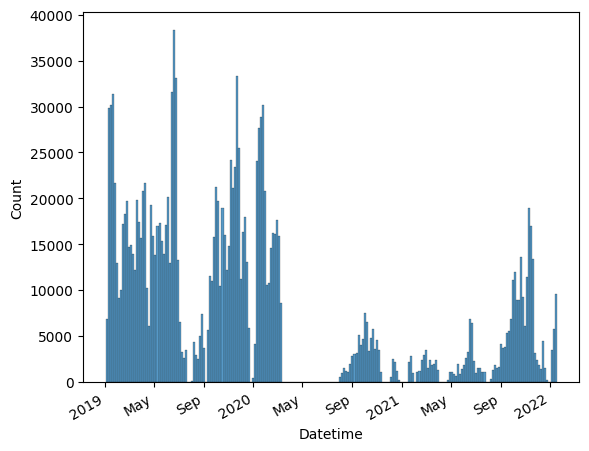

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots()

sns.histplot(data=drehkreuz, x = "Datetime", ax=ax)

ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

We see several things here: 
1) a significant drop of overall visitor numbers in 2020 and 2021, compared to the years before
2) throughout the dataset, we have several blocks of consecutive days where no visitors were recorded
3) we also have a large block of days in early 2020 where no visitors were recorded.

Can we find explanations for this behavior?

It turns out, yes! 

Considering point 1, the most likely reason for the drop of overall visitors is the effects of the Covid-19 pandemic and the increasing number of lectures and other events that were moved online. This reduced the number of students, employees, and visitors on campus, resulting in fewer people entering the library.

For point 2, a likely explanation is that the library is closed on holidays, thus no visitors are recorded entering the library.

For point 3, we have to take additional context information into account. This large block of days without visitors in March/April/May 2020 coincides with the first lockdown due to Covid-19. During the lockdown, the library and other public university buildings were closed, resulting in a lack of visitors.  

<div class="alert alert-block alert-warning">
<strong>Exercise:</strong><br>
Now it's your turn. Calculate the average actual loan time for the different user groups in the data (column User Group).<br><br>
    
Which user groups have the highest actual loan times for books, and which ones the lowest? <br>
Do you have a potential explanation for this different in average loan times? 
</div>


/tmp/ipykernel_2232/3417142433.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


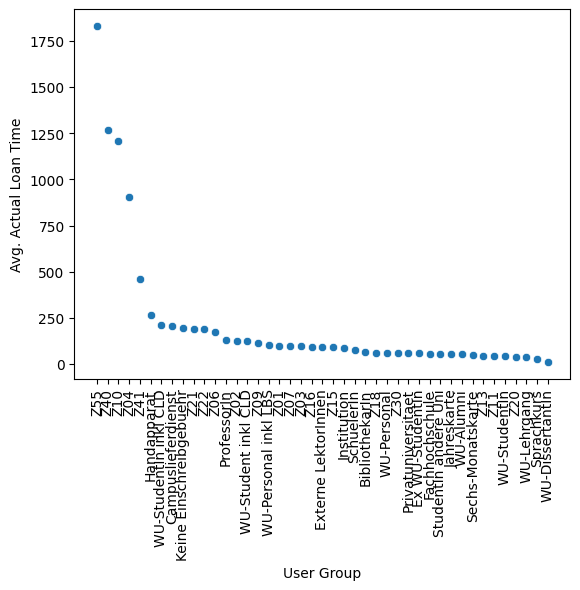

,User Group,Actual Loan Time
42,Z55,1830.950820
40,Z40,1267.326284
30,Z10,1207.500000
26,Z04,903.600000
41,Z41,457.672414
5,Handapparat,263.769231
22,WU-StudentIn inkl CLD,213.192529
1,Campuslieferdienst,203.246080
8,Keine Einschreibgebuehr,195.000000
37,Z21,190.333333


In [24]:
import matplotlib.pyplot as plt
lib_loan_plot = lib_loan.groupby(['User Group'], as_index = False)['Actual Loan Time'].mean().sort_values("Actual Loan Time", ascending = False)

g = sns.scatterplot(data=lib_loan_plot, x="User Group", y = "Actual Loan Time")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.ylabel("Avg. Actual Loan Time")

plt.show()
lib_loan_plot

## Further Data Preparation

### Transforming variables


Some of the most common transformations are:

-   **Numerical** variables: centering, scaling, normalization

-   **Categorical** variables: transcoding, combining several categories/levels into a new category

Let's look at an example for numerical variables..

#### Scaling

In [25]:
# create a scaled representation of the loan data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# the StandardScaler will transform the variable into having a mean of 0 and a unit-variance (i.e., standard deviation of 1)
standard_scaler = StandardScaler()
lib_loan["Max Loan Time Scaled"] = standard_scaler.fit_transform(lib_loan[["Max Loan Time"]]) 

# the MinMaxScaler will transform the variable to the range [0, 1]
min_max_scaler = MinMaxScaler()
lib_loan["Actual Loan Time Scaled_min_max"] = min_max_scaler.fit_transform(lib_loan[["Actual Loan Time"]]) 

Let's check if the transformation worked:

In [26]:
lib_loan[["Max Loan Time", "Max Loan Time Scaled", "Actual Loan Time", "Actual Loan Time Scaled_min_max"]].describe()

,Max Loan Time,Max Loan Time Scaled,Actual Loan Time,Actual Loan Time Scaled_min_max
count,20000.00000,2.000000e+04,17943.000000,17943.000000
mean,375.23935,-8.348877e-18,98.049657,0.025647
std,1159.15646,1.000025e+00,301.530800,0.078873
min,0.00000,-3.237257e-01,0.000000,0.000000
25%,19.00000,-3.073341e-01,14.000000,0.003662
50%,42.00000,-2.874915e-01,37.000000,0.009678
75%,132.00000,-2.098469e-01,87.000000,0.022757
max,7495.00000,6.142345e+00,3823.000000,1.000000


**Why would scaling be useful?**

On the one hand, some clustering/regression/classification methods work better/converge faster with scaled data. 

On the other hand, from an interpretation perspective the new center (mean 0) represents the 'average' customer value for this variable. Values smaller than 0 indicate lower than average, and values above 0 higher than average values.

### Feature Selection


Often, we have many different variables in our data that we could potentially use in the subsequent analysis. However, using many variables increases the complexity of the models, yet does not necessarily increase their usefulness (see also: **curse of dimensionality**). 

Hence, the step of **Variable Selection** (or **Feature Selection**) has the goal to identify the actually useful variables for consideration in analytic models. 

However, this is not straigtforward. Specifically, identifying relevant variables to include is often dependent on the type of model that is being used in the subsequent steps. Generally, we can distinguish between the following types of Variable Selection models:

<img src="FeatureSelection.png" width="1200px">



# Unsupervised Learning

Once we have gained an initial data understanding (and performed our initial data preparation steps), we move on to the modeling part of the Data Analytics lifecycle. 

## Supervised vs. unsupervised learning

Here, we distinguish between two different types of models: **Unsupervised Models**, and **Supervised Models**.

<img src="SupervisedVsUnsupervised.png" width="1200px">

Briefly, in unsupervised learning we are interested in the relationships between variables and/or observations in our data. Yet, we do not have a specific **target variable** that we want to predict or understand. 

In contrast, supervised learning considers models that aim to model a **target variable** as a function of (a set of) variables in the dataset.

## Types of unsupervised methods

In this section, we focus on **unsupervised learning**, specifically **clustering**. In general, depending on whether we want to explore relationships between the variables or between the observations, we can also distinguish between different unsupervised learning approaches:

<img src="UnsupervisedLearning.png" width="1200px">

## Clustering

### Overview

Typically, understanding the relationships between the observations/records in your data is one of the first steps that you conduct in a Data Analytics project. This can be in the form of descriptive statistics as we've explored before(e.g., calculating correlations, or visualizing various relationships between variables). Here, we focus on a different approach: **Clustering**.

The idea behind clustering is to find observations (e.g., visitors, books) that are similar to each other, and group them in the same clusters. The goal is to find clusters that represent observations that are similar to each other, while observations between different clusters should be different.

<img src="Clustering.png" width="1200px">

One of the most common examples is **Market Segmentation**. In this use case, the goal is to group customers into different groups (segments) that represent different customer characteristics. E.g., one cluster could be young professionals with high disposable income, the other cluster retired people with less income. 
In our case, we might want to find groups of visitors, or groups of books, with similar characteristics. 

Two main questions in clustering that we need to address are:

1.  How do we define **similarity** between observations? I.e., when do we define two observations in our data to be similar, and when do we define them as different?

2.  Which variables (e.g., customer characteristics) do I want to include in this analysis?

### Calculate (Dis)Similarity

Next, let us define, and calculate, the similarity between observations. Technically, we need to calculate the similarity for each pair of observations.

One of the most common similarity measures is the Euclidean distance:

$Euclidean Distance(x_i,x_j) = \sqrt(\sum_{l=1}^{p}(x_{i,l}-x_{j,l})^2)$

However, this is only defined for numerical variables. For categorical variables, it's more complicated and we need to convert them into a numerical representation first and use an appropriate clustering algorithm next.

Here, we simply use two numerical features and will use the standard Euclidean distance measure
<!-- Here, we use the **Gower dissimilarity**. -->

### Calculate the clustering

Once we have calculated the dissimilarity matrix, we can use a clustering algorithm to aggregate observations into clusters. Similar observations, i.e., observations with a small pairwise distance, will be grouped together, and observations with a large dissimilarity should be grouped into different clusters.

For some clustering algorithms such as the **k-means algorithm**, we need to provide the number of clusters that we want to create. Finding a "good" number of clusters is a challenging tasks and will be discussed in more detail below. Other algorithms, e.g. **agglomerative approaches** such as **hierarchical clustering**, do not require the number of clusters to be specified beforehand, yet the same challenge of determining a "good" number of clusters remain.

Here, we use the **k-means algorithm** and use only two variables for the distance calculation: max loan time, and actual loan time. 

The **k-means algorithm** is a heuristic that works as follows:
1) Randomly allocate observations to one of the k clusters

2) Calculate cluster centroid for each cluster

3) Calculate the distance of each observation to every cluster centroid

4) Re-allocate observations to the closest cluster centroid.

5) Repeat steps 2-4 until no observation is re-allocated.

<div class="alert alert-block alert-info">
<strong>k-means as heuristic:</strong>
Note that k-means is a heuristic that iteratively re-calculates the clusters, cluster centroids, and which observation belongs to which cluster. Hence, the result will depend on the initialization of the process, i.e., which cluster the observations are allocated to in the first step. 
To allow for the reproducibility of the results, we can add a "random_state" to the kmeans function that sets the underlying random number generator to a specific state.
</div>

Let's visualize this in a step-by-step approach:

<img src="K-Means.png" width="1200px">

In [27]:
from sklearn.cluster import KMeans

# note that we also need to drop any NAs here as kmeans does not handle NA values
lib_loan_no_na = lib_loan.dropna(subset =["Max Loan Time", "Actual Loan Time"]).reset_index()

X = lib_loan_no_na[["Max Loan Time", "Actual Loan Time"]].values

# for k-means, we need to specify the number of clusters. Let's use 4 for now, but this will need to be re-evaluated in more detail.
n_cluster = 4

# We can also specify how many times the k-means should be run with varying centroid seeds - we will use 10 runs for now (sklearn will report the best result in terms of inertia)
n_init = 10

kmeans = KMeans(n_clusters=n_cluster, n_init=n_init, random_state=1).fit(X)

How do we get the information which observation belongs to which cluster? This information is saved as part of the output of the clustering method:

In [28]:
# we can get the information which observation belongs to which cluster, and also the cluster center information

# the labels are the cluster id's for each observation
kmeans.labels_

array([3, 3, 3, ..., 3, 0, 0], dtype=int32)

We can also investigate the cluster centers. Here, as we have 4 clusters built on 2 variables, each cluster center will have one value for each variable, representing where in the 2-dimensional space it is.

In [29]:
kmeans.cluster_centers_

array([[  35.7037854 ,   30.00704426],
       [3708.55263158,  756.38596491],
       [5209.86976744, 2590.6744186 ],
       [ 200.34157303,  195.04578652]])

We can calculate the number of observations in each cluster:

In [30]:
from collections import Counter
Counter(kmeans.labels_)

Counter({3: 3560, 0: 14054, 1: 114, 2: 215})

Let's visualize the clusters as well. 

In [31]:
from seaborn import scatterplot

plot_data = lib_loan[["Max Loan Time", "Actual Loan Time"]].dropna()
plot_data["Cluster"] = kmeans.labels_

plot_data

,Max Loan Time,Actual Loan Time,Cluster
0,140,125.0,3
1,169,146.0,3
2,163,135.0,3
3,0,0.0,0
4,14,13.0,0
...,...,...,...
19995,0,0.0,0
19996,45,46.0,0
19997,137,129.0,3
19998,62,51.0,0


<Axes: xlabel='Max Loan Time', ylabel='Actual Loan Time'>

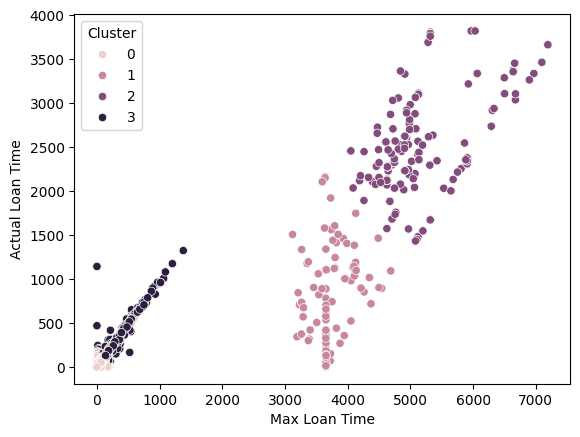

In [32]:
sns.scatterplot(data=plot_data, x="Max Loan Time", y="Actual Loan Time", hue="Cluster")

<div class="alert alert-block alert-warning">
<strong>Exercise:</strong>
Build a clustering with 3 clusters as well as 5 clusters. Visualize the clusters. What are the differences in clusters built in the different approaches?</div>

<Axes: xlabel='Max Loan Time', ylabel='Actual Loan Time'>

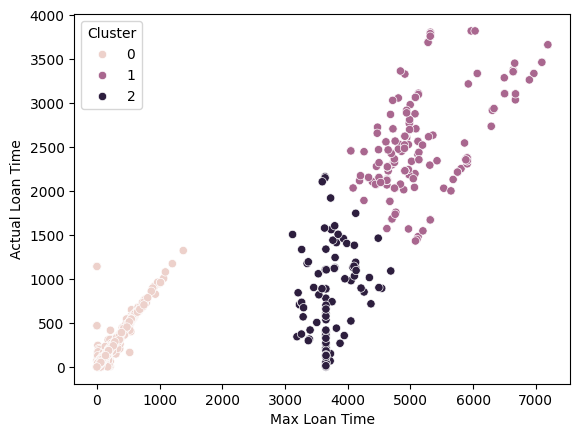

In [33]:
n_cluster = 3
kmeans = KMeans(n_clusters=n_cluster, random_state=1).fit(X)
Counter(kmeans.labels_)
plot_data = lib_loan[["Max Loan Time", "Actual Loan Time"]].dropna()
plot_data["Cluster"] = kmeans.labels_

sns.scatterplot(data=plot_data, x="Max Loan Time", y="Actual Loan Time", hue="Cluster")

### Determining the number of clusters

Determining the number of clusters is not a straightforward as it may seem. There are different ways of determining what a good number of clusters is. If we are in a true unsupervised scenario where we don't have the information what the "correct" cluster for an observation is, we have to rely on clustering-internal metrics. These metrics essentially quantify how similar observations within a cluster are, compared to observations in other cluster.

Common examples of metrics that are used:
- Within-sum-of-squares: calculated as the Euclidean distance from cluster observations to the cluster centroid, then averaged across clusters.
- Silhouette Index
- Davies-Bouldin Score

Let's start with the Within-sum-of-squares (WSS), which is used in combination with the Elbow method as WSS tends to decrease with an increasing number of clusters. 

In [34]:
sum_of_squares = []

K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=1).fit(X)
    sum_of_squares.append(kmeans.inertia_)

In [35]:
sum_of_squares_frame = pd.DataFrame({"K":K, "sum_of_squares": sum_of_squares})
sum_of_squares_frame

,K,sum_of_squares
0,1,8.924779e+09
1,2,8.734342e+08
2,3,4.548595e+08
3,4,3.004981e+08
4,5,2.161657e+08
5,6,1.681814e+08
6,7,1.362461e+08
7,8,1.163738e+08
8,9,9.783853e+07


<Axes: xlabel='K', ylabel='sum_of_squares'>

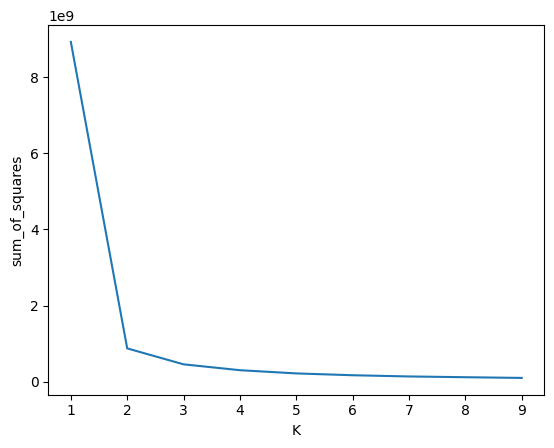

In [36]:
sns.lineplot(data=sum_of_squares_frame, x="K", y="sum_of_squares")

Here, 2 clusters seem to be a good number.

We can also investigate to what degree scaling makes a difference.

In [37]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

sum_of_squares_scaled = []

K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=n_init).fit(X_scaled)
    sum_of_squares_scaled.append(kmeans.inertia_)

<Axes: xlabel='K', ylabel='sum_of_squares'>

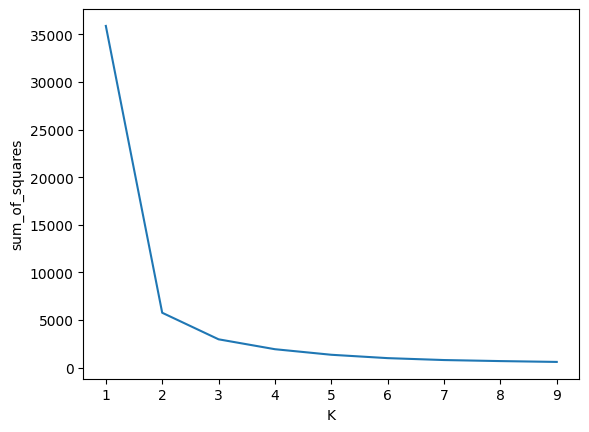

In [38]:
sum_of_squares_scaled_frame = pd.DataFrame({"K":K, "sum_of_squares": sum_of_squares_scaled})
sns.lineplot(data=sum_of_squares_scaled_frame, x="K", y="sum_of_squares")

Similar to before, 2 clusters seem to be appropriate.

Let's look at the Davies-Bouldin score as alternative (note: the silhouette coefficient can be expensive to calculate, hence we use a simpler metric for this showcase):

In [39]:
from sklearn.metrics import davies_bouldin_score

db_scores = []
K = range(2,10)

for k in K:
    print("current number of clusters: ", k)
    kmeans_preds = KMeans(n_clusters=k, n_init=n_init).fit_predict(X)
    print("calculating Davies-Bouldin score")
    db_scores.append(davies_bouldin_score(X, kmeans_preds))

current number of clusters:  2
calculating Davies-Bouldin score
current number of clusters:  3
calculating Davies-Bouldin score
current number of clusters:  4
calculating Davies-Bouldin score
current number of clusters:  5
calculating Davies-Bouldin score
current number of clusters:  6
calculating Davies-Bouldin score
current number of clusters:  7
calculating Davies-Bouldin score
current number of clusters:  8
calculating Davies-Bouldin score
current number of clusters:  9
calculating Davies-Bouldin score


In [40]:
db_scores

[0.2565083463724997,
 0.42023676588601894,
 0.5143440596699422,
 0.6431429417758129,
 0.5904632598606457,
 0.6210619621319429,
 0.6674193564641834,
 0.596748087125357]

<Axes: xlabel='K', ylabel='Davies-Bouldin Score'>

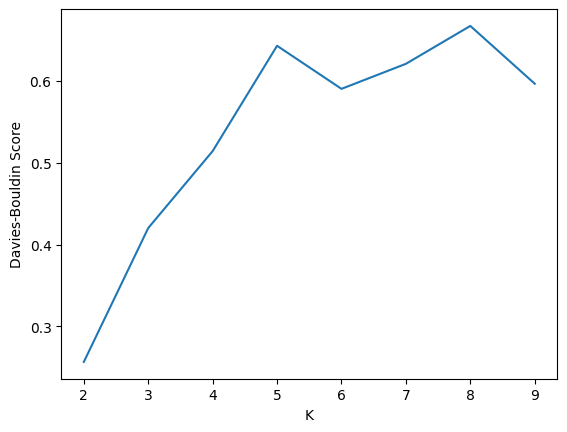

In [41]:
db_scores_frame = pd.DataFrame({"K":K, "Davies-Bouldin Score": db_scores})
sns.lineplot(data=db_scores_frame, x="K", y="Davies-Bouldin Score")

As we select the minimum DB-score, we would again go with 2 clusters.

Finally, let's visualize these two clusters.

<Axes: xlabel='Max Loan Time', ylabel='Actual Loan Time'>

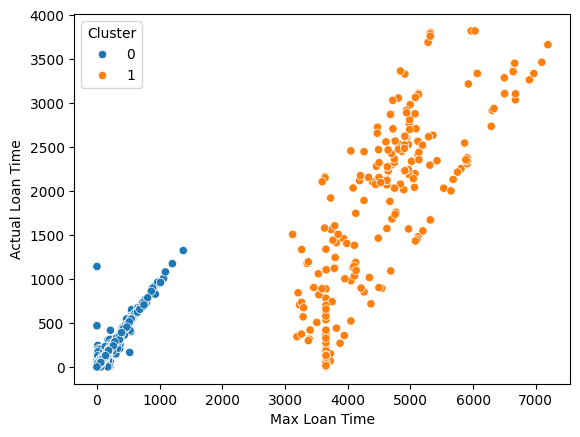

In [42]:
#re-build the clustering with two clusters
kmeans = KMeans(n_clusters=2, n_init=n_init, random_state=1).fit(X)

plot_data = lib_loan[["Max Loan Time", "Actual Loan Time"]].dropna()
plot_data["Cluster"] = kmeans.labels_

sns.scatterplot(data=plot_data, x="Max Loan Time", y="Actual Loan Time", hue="Cluster")

### Investigating Cluster Properties

Once we determine the number of clusters we want to use and which observation belongs to what cluster, we can start investigating the differences between clusters. 

In [43]:
lib_loan_no_na["Cluster"] = kmeans.labels_


<Axes: xlabel='count', ylabel='Library Name'>

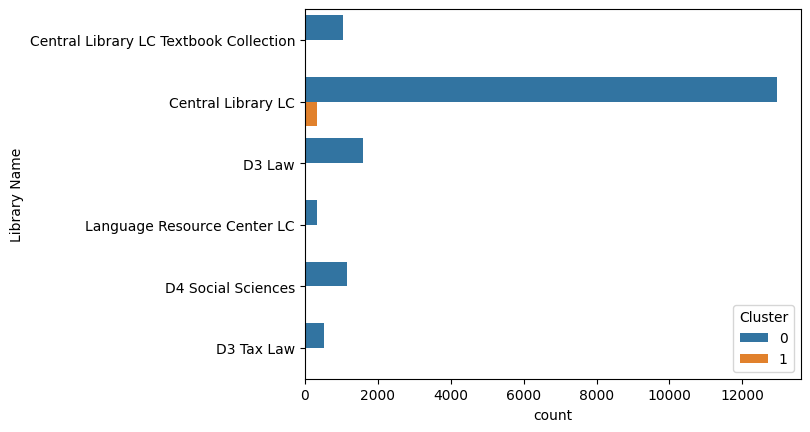

In [44]:
sns.countplot(y="Library Name", hue="Cluster", data=lib_loan_no_na)

Here, we see that the second cluster only has books from the Central Library LC. We also see that the second cluster is much smaller than the first one, so the vast majority of books lent by the library fall in the first cluster. 

<div class="alert alert-block alert-warning">
<strong>Exercise:</strong>
Using Days Late and Max Loan Time as variables, create a different clustering solution. Try different numbers of clusters, select a good number of clusters via the DB-score method, and calculate how many observations fall in the clusters.
</div>

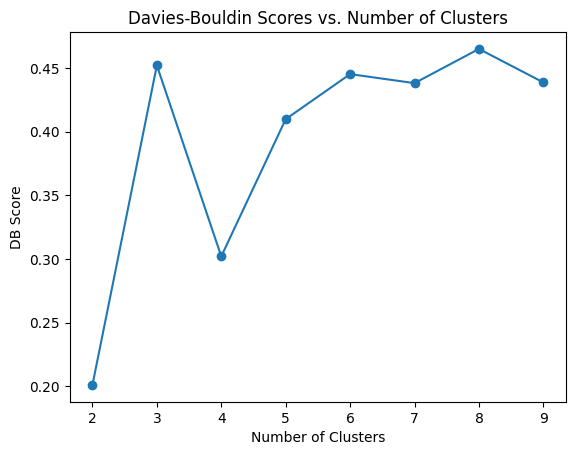

Optimal number of clusters (without standardization): 2


In [45]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Handling missing values for 'Days Late' and 'Max Loan Time'
lib_loan = lib_loan.dropna(subset=['Days Late', 'Max Loan Time'])

# Initial Clustering without Standardization
X = lib_loan[['Days Late', 'Max Loan Time']].values

# Try clustering with a range of cluster numbers and calculate DB scores
db_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    preds = kmeans.predict(X)
    db_score = davies_bouldin_score(X, preds)
    db_scores.append(db_score)

# Plotting DB Scores to find the optimal number of clusters
plt.plot(range(2, 10), db_scores, marker='o')
plt.title('Davies-Bouldin Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Score')
plt.show()

# Selecting the number of clusters with the lowest DB Score
optimal_clusters = np.argmin(db_scores) + 2  # Adding 2 because our range starts from 2

print(f'Optimal number of clusters (without standardization): {optimal_clusters}')

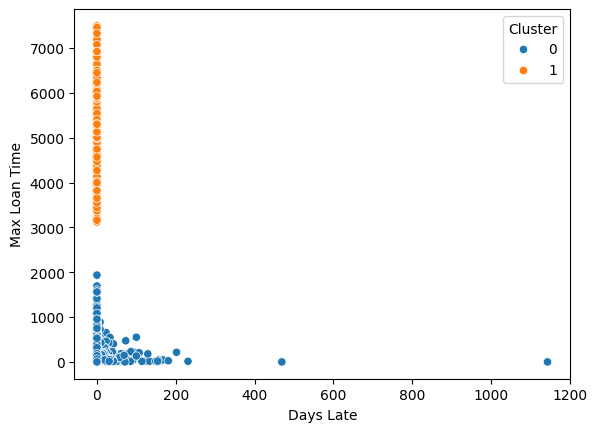

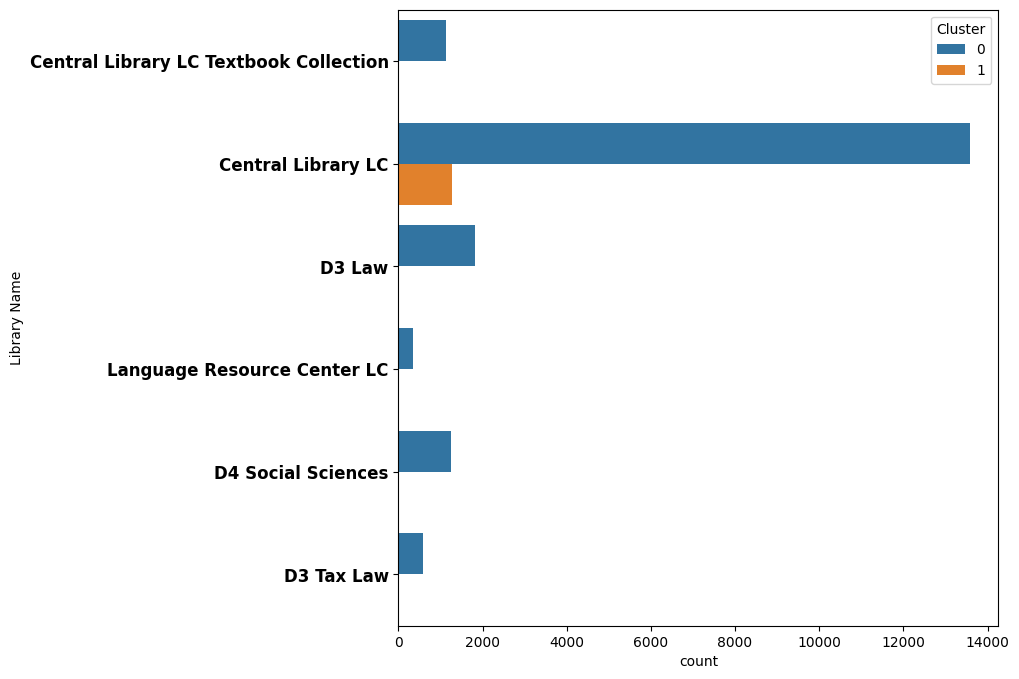

In [46]:
## PLOT THE CLUSTER DISTRIBUTION ##

#re-build the clustering with two clusters
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

plot_data = lib_loan[["Days Late", "Max Loan Time"]].dropna()

plot_data["Cluster"] = kmeans.labels_
lib_loan["Cluster"] = kmeans.labels_

#re-build the clustering with two clusters
kmeans = KMeans(n_clusters=2, n_init=n_init, random_state=1).fit(X)

#plot the two variables with the respective clusters
sns.scatterplot(data=plot_data, x="Days Late", y="Max Loan Time", hue="Cluster")

## PLOT THE CLUSTER ##

plt.figure(figsize=(10, 8))

ax = sns.countplot(y="Library Name", hue="Cluster", data=lib_loan)

# Set larger font size and rotation for y-axis labels
plt.setp(ax.get_yticklabels(), fontsize=12, rotation=0, ha="right", weight="bold")

# Adjust the spacing
plt.subplots_adjust(left=0.3)

# Show the plot
plt.show()

In [47]:
lib_loan

,Title,ISBN,Publisher,Author,Author (contributor),Publication Place,Subjects,Loan Date,Due Date,Return Date,...,Library Name,Location Name,User Group,Max Loan Time,Actual Loan Time,Late Return,Days Late,Max Loan Time Scaled,Actual Loan Time Scaled_min_max,Cluster
0,Legal discourse across cultures and systems,9789622098527; 9622098525; 9789622098510; 9622...,Hong Kong Univ Press,NaN,"Bhatia, V. K. 1942-",Hong Kong,NaN,2019-05-07,2019-09-24,2019-09-09,...,Central Library LC Textbook Collection,NaN,Campuslieferdienst,140,125.0,0,0.0,-0.202945,0.032697,0
1,Erbschaftssteuern und Doppelbesteuerungsabkommen,3707303136; 9783707303131,Linde,NaN,"Aigner, Dietmar Johannes 1973-",Wien,Oesterreich; Doppelbesteuerungsabkommen; Erbsc...,2020-02-20,2020-08-07,2020-07-15,...,Central Library LC,Level -2 Books,Campuslieferdienst,169,146.0,0,0.0,-0.177926,0.038190,0
2,The Routledge companion to digital consumption,0415679923; 9780415679923; 9780203105306; 0203...,Routledge,NaN,"Belk, Russell W. 1945-",London [u.a.],Informationstechnik; Verbraucherverhalten; Inf...,2019-06-05,2019-11-15,2019-10-18,...,Central Library LC,Level 5,WU-StudentIn inkl CLD,163,135.0,0,0.0,-0.183103,0.035313,0
3,Eigentumsvorbehalt und Sicherungsuebertragung ...,3800569116; 9783800569113,Verl Recht u Wirtschaft,NaN,"Fichna, Gudrun [Bearb.]; Stumpf, Herbert",Heidelberg,Conditional sales--Automatisch aus GBV_2011-10...,2019-08-05,2019-08-05,2019-08-05,...,D3 Law,Books,NaN,0,0.0,0,0.0,-0.323726,0.000000,0
4,Verfassungsrecht,9783700765936; 3700765932,LexisNexis,Oesterreich,"LexisNexis Verlag; Lanner, Christoph",Wien,Quelle; Oesterreich; Verfassungsrecht; Oesterr...,2018-10-03,2018-10-17,2018-10-16,...,Central Library LC,Level 6,WU-StudentIn,14,13.0,0,0.0,-0.311648,0.003400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Klaus Vogel on double taxation conventions,9789041160553; 9041160558,Wolters Kluwer Law & Business,NaN,"Becker, Johannes; Rust, Alexander 1973-; Reime...",London [u.a.],NaN,2019-04-26,2019-04-26,2019-04-26,...,D3 Tax Law,Books,NaN,0,0.0,0,0.0,-0.323726,0.000000,0
19996,Wege aus der Krise Ideen und Konzepte fuer morgen,9783643504661; 3643504667,Lit-Verl,NaN,"Bierdel, Elias 1960-",Wien [u.a.],Wirtschaftskrise; Alternative Wirtschaftspolit...,2018-02-17,2018-04-03,2018-04-04,...,Central Library LC,Level 6,Fachhochschule,45,46.0,1,1.0,-0.284903,0.012032,0
19997,Research methods for business students,9781292016627; 1292016620,Pearson,"Saunders, Mark 1959-","Thornhill, Adrian; Lewis, Philip 1945-","Harlow, England London New York",Betriebswirtschaftslehre; Forschungsmethode; W...,2019-06-28,2019-11-12,2019-11-04,...,Central Library LC,Level 5,Campuslieferdienst,137,129.0,0,0.0,-0.205533,0.033743,0
19998,Psychologie der Mitarbeiterfuehrung Wirtschaft...,365807275X; 9783658072759; 9783658072766; 3658...,Springer,"Becker, Florian 1977-",NaN,Wiesbaden,Mitarbeiterfuehrung; Personal; Personalfuehrun...,2019-01-22,2019-03-25,2019-03-14,...,Central Library LC,Level 6,Fachhochschule,62,51.0,0,0.0,-0.270237,0.013340,0


<div class="alert alert-block alert-warning">
<strong>Exercise:</strong>
Now, standardize the variables first. I.e., following the Feature Transformation step from earlier, use a StandardScaler() to transform the variables into having a mean of 0 and standard deviation of 1. Re-create the previous clustering approach using the Days Late and Max Loan Time variables.
    <ul>
        <li>How many clusters would you select?</li>
        <li>How do the clusters differ from the ones that we calculated initially on the original / untransformed variables?</li>
    </ul>
</div>

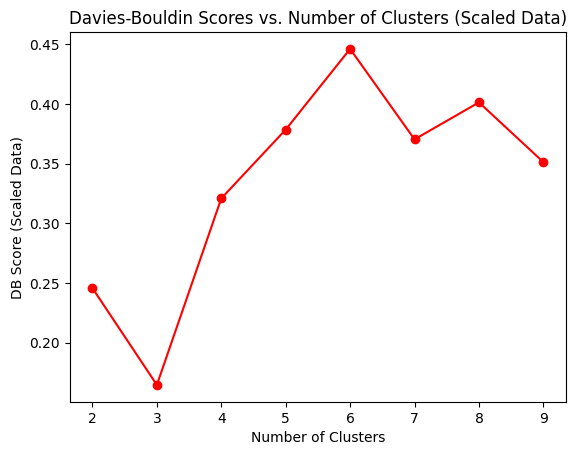

Optimal number of clusters (with standardization): 3


In [48]:
# Repeating the process with standardized data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Repeating the DB score calculation for standardized data
db_scores_scaled = []
for k in range(2, 10):
    kmeans_scaled = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    preds_scaled = kmeans_scaled.predict(X_scaled)
    db_score_scaled = davies_bouldin_score(X_scaled, preds_scaled)
    db_scores_scaled.append(db_score_scaled)

# Plotting DB Scores for the scaled data
plt.plot(range(2, 10), db_scores_scaled, marker='o', color='red')
plt.title('Davies-Bouldin Scores vs. Number of Clusters (Scaled Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Score (Scaled Data)')
plt.show()

# Selecting the number of clusters with the lowest DB Score for scaled data
optimal_clusters_scaled = np.argmin(db_scores_scaled) + 2

print(f'Optimal number of clusters (with standardization): {optimal_clusters_scaled}')

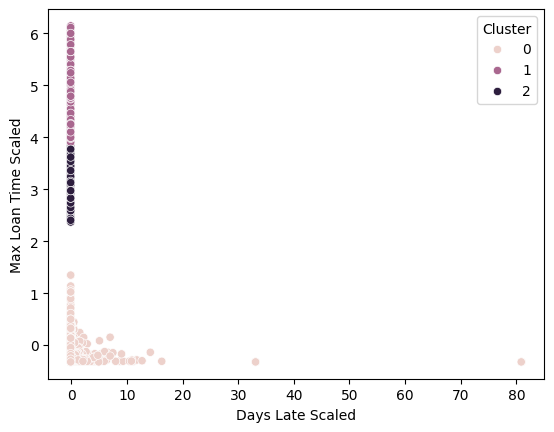

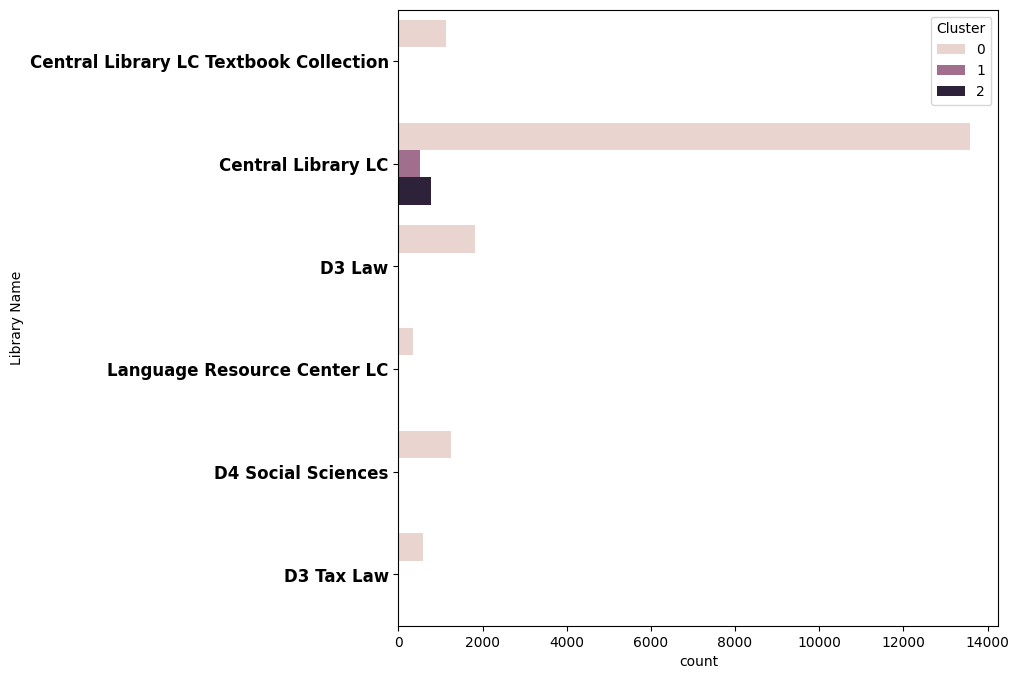

In [49]:
#re-build the clustering with two clusters
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

plot_data = lib_loan[["Days Late", "Max Loan Time"]].dropna()
plot_data["Days Late Scaled"] = standard_scaler.fit_transform(plot_data[["Days Late"]])
plot_data["Max Loan Time Scaled"] = standard_scaler.fit_transform(plot_data[["Max Loan Time"]])
plot_data["Cluster"] = kmeans.labels_
lib_loan["Cluster"] = kmeans.labels_

#plot the two standard-scaled variables with the respective clusters
sns.scatterplot(data=plot_data, x="Days Late Scaled", y="Max Loan Time Scaled", hue="Cluster")

# Set the figure size
plt.figure(figsize=(10, 8))

ax = sns.countplot(y="Library Name", hue="Cluster", data=lib_loan)

# Set larger font size and rotation for y-axis labels
plt.setp(ax.get_yticklabels(), fontsize=12, rotation=0, ha="right", weight="bold")

# Adjust the spacing
plt.subplots_adjust(left=0.3)

# Show the plot
plt.show()

### Clustering: Outlook

k-means clustering is only one specific type of clustering algorithm. Other approaches include **hierarchical clustering**, and **density-based clustering**. 

Not all clustering approaches will work equally well on a specific dataset. Hence, after exploring and understanding the data, it is crucial to investigate which specific clustering approach (and its assumptions) best fit the data and the goal of the clustering. Furthermore, even for a specific clustering approach (e.g., agglomerative hierarchical clustering), different parameters can be chosen that fundamentally change the types and sizes of clusters that are being built. 